In [ ]:
import json
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import h5py
import matplotlib.pyplot as plt

# PREPROCESS DATA

In [ ]:
data_path = '/content/translated_intents.json'

In [ ]:
with open(data_path, 'r') as f:
    data = json.load(f)

In [ ]:
intents = data['intents']

In [ ]:
X = []
y = []

for intent in intents:
    for pattern, response in zip(intent['patterns'], intent['responses']):
        X.append(pattern)
        y.append(response)


In [ ]:

for i in range(10):
    print(f'Text "{X[i]}" is labeled "{y[i]}"')

Text "Hai" is labeled "Halo yang disana.Katakan padaku bagaimana perasaanmu hari ini?"
Text "Hai" is labeled "Hai, yang di sana.Apa yang membawamu ke sini hari ini?"
Text "Apakah ada orang di sana?" is labeled "Hai, yang di sana.Bagaimana perasaan Anda hari ini?"
Text "Hai, yang di sana" is labeled "Senang bertemu denganmu.Bagaimana perasaan Anda saat ini?"
Text "Halo" is labeled "Halo yang disana.Senang melihat Anda kembali.Apa yang terjadi di dunia Anda saat ini?"
Text "Selamat pagi" is labeled "Selamat pagi.Saya harap Anda tidur nyenyak.Bagaimana perasaan Anda hari ini?"
Text "Selamat siang" is labeled "Selamat siang.Bagaimana hari mu?"
Text "Selamat malam" is labeled "Selamat malam.Bagaimana harimu?"
Text "Selamat malam" is labeled "Selamat malam.Tidur nyenyak"
Text "Selamat tinggal" is labeled "Sampai jumpa lagi."


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

num_classes = len(set(y))
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# PREPARE MODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X.shape[1]),
    LSTM(128),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# TRAIN

In [ ]:
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X, y_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X, y_encoded))
model.save('my_model_NLP.h5')

# Save tokenizer and label encoder separately
# Save tokenizer to JSON
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w') as f:
    f.write(tokenizer_json)

# Save label encoder to JSON
label_encoder_json = json.dumps(label_encoder.classes_.tolist())
with open('label_encoder.json', 'w') as f:
    f.write(label_encoder_json)


Epoch 1/50
8/8 [==============================] - 3s 183ms/step - loss: 5.4419 - accuracy: 0.0041 - val_loss: 5.4288 - val_accuracy: 0.0691
Epoch 2/50
8/8 [==============================] - 2s 216ms/step - loss: 5.4266 - accuracy: 0.1057 - val_loss: 5.4174 - val_accuracy: 0.1707
Epoch 3/50
8/8 [==============================] - 2s 218ms/step - loss: 5.4148 - accuracy: 0.1463 - val_loss: 5.4026 - val_accuracy: 0.2439
Epoch 4/50
8/8 [==============================] - 1s 112ms/step - loss: 5.3971 - accuracy: 0.1992 - val_loss: 5.3742 - val_accuracy: 0.1179
Epoch 5/50
8/8 [==============================] - 1s 114ms/step - loss: 5.3719 - accuracy: 0.0488 - val_loss: 5.3239 - val_accuracy: 0.1098
Epoch 6/50
8/8 [==============================] - 1s 115ms/step - loss: 5.3072 - accuracy: 0.0976 - val_loss: 5.2069 - val_accuracy: 0.0488
Epoch 7/50
8/8 [==============================] - 1s 117ms/step - loss: 5.2187 - accuracy: 0.0407 - val_loss: 5.1252 - val_accuracy: 0.0650
Epoch 8/50
8/8 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


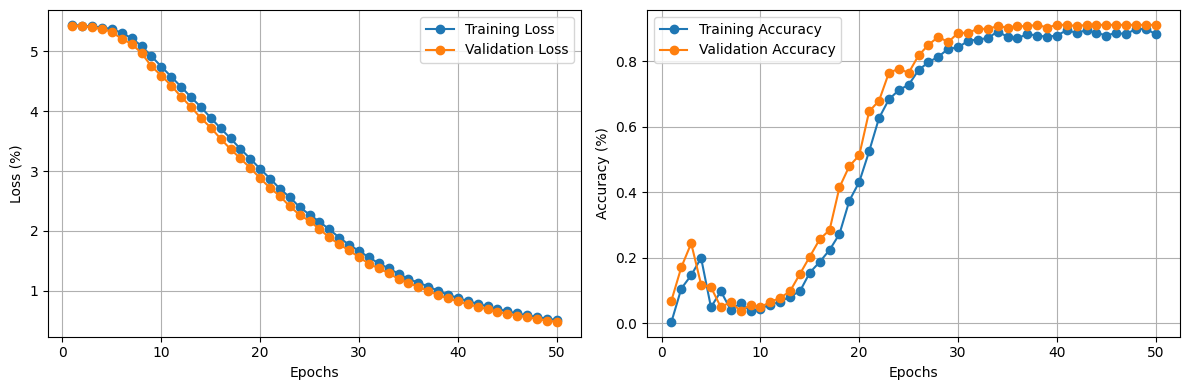

In [ ]:
# Plotting
plt.figure(figsize=(12, 4))
epochs = range(1, EPOCHS + 1)

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.grid()
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# PREDICT

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
from keras.models import load_model
import numpy as np

# Load the trained model
model = load_model('/content/my_model_NLP.h5')

# Define a function to predict intents
def predict_intent(text):
    # Preprocess input text using the tokenizer
    tokenized_text = tokenizer.texts_to_sequences([text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_sequence_length)

    # Predict the intent
    predictions = model.predict(padded_text)

    # Get the index of the highest probability prediction
    predicted_index = np.argmax(predictions)

    # Map the index to the corresponding label
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    return predicted_label

# Example usage
user_input = "apa itu memiliki penyakit mental?"
max_sequence_length = 40
predicted_intent = predict_intent(user_input)
print("Predicted intent:", predicted_intent)


1/1 [==============================] - 0s 439ms/step
Predicted intent: Penyakit mental adalah kondisi kesehatan yang mengganggu pikiran, emosi, hubungan, dan fungsi sehari -hari seseorang.Mereka dikaitkan dengan kesusahan dan berkurangnya kapasitas untuk terlibat dalam kegiatan kehidupan sehari -hari yang biasa.Penyakit mental jatuh di sepanjang rangkaian keparahan: beberapa cukup ringan dan hanya mengganggu beberapa aspek kehidupan, seperti fobia tertentu.Di ujung lain spektrum terletak penyakit mental yang serius, yang mengakibatkan gangguan fungsional utama dan gangguan dengan kehidupan sehari -hari.Ini termasuk gangguan seperti depresi berat, skizofrenia, dan gangguan bipolar, dan mungkin mengharuskan orang tersebut menerima perawatan di rumah sakit.Penting untuk mengetahui bahwa penyakit mental adalah kondisi medis yang tidak ada hubungannya dengan karakter, kecerdasan, atau kemauan seseorang.Sama seperti diabetes adalah kelainan pankreas, penyakit mental adalah kondisi medis kare